# Ablation Study

Ablation Study w kontekście machine learning-u (a w szczególności deep learning-u) to termin oznaczający dokładne poznawanie działania modelu poprzez usuwanie jego części i monitorowanie otrzymanego zachowania. W ten sposób można zaobserwować co i w jaki sposób oddziaływuje na nasz model.

Źródło: https://stats.stackexchange.com/questions/380040/what-is-an-ablation-study-and-is-there-a-systematic-way-to-perform-it

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from pylab import *
import itertools

W tej pracy domowej zajmiemy się zbiorem Mnist.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

W tym celu wykorzystamy model pochodzący z https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.1-introduction-to-convnets.ipynb

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Możemy spojrzeć jak wyglądają warstwy w naszym modelu

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 15,
                      batch_size = 128, validation_data = (test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 47s 99ms/step - loss: 0.5350 - accuracy: 0.8313 - val_loss: 0.0776 - val_accuracy: 0.9749
Epoch 2/15
469/469 [==============================] - 41s 88ms/step - loss: 0.0608 - accuracy: 0.9804 - val_loss: 0.0477 - val_accuracy: 0.9842
Epoch 3/15
469/469 [==============================] - 41s 87ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 4/15
469/469 [==============================] - 41s 88ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0305 - val_accuracy: 0.9905
Epoch 5/15
469/469 [==============================] - 40s 86ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0259 - val_accuracy: 0.9920
Epoch 6/15
469/469 [==============================] - 41s 86ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0257 - val_accuracy: 0.9921
Epoch 7/15
469/469 [==============================] - 40s 85ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0222 - val_accuracy:

In [7]:
def plot_history(history_):
    legend = ['train set', 'test set']
    plt.legend(legend, loc='upper right')
    plt.plot(history_.history['accuracy'])
    plt.plot(history_.history['val_accuracy'])
    plt.title('model accuracy\n', size = 16)
    plt.ylabel('accuracy', size = 13)
    plt.xlabel('epoch', size = 13)
    plt.legend(legend, loc='lower right', fontsize = 15)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(15, 6)
    plt.show()

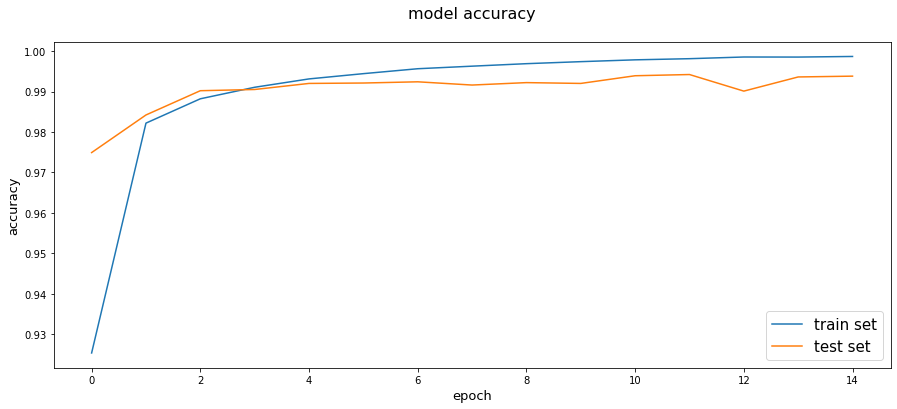

In [8]:
plot_history(history)

Widzimy, że taki model świetnie sobie radzi ze zbiorem i treningowym, i testowym (ciekawe są właściwie dwie pierwsze epoki kiedy to na zbiorze testowym otrzymujemy lepsze accuracy).

## Modyfikacje modelu

W dalszej części będziemy wprowadzać zmiany do modelu i obserwować jak będzie się zachowywać (tzn. będziemy porównywać otrzymywane wartości accuracy do początkowego modelu).

### 1. Usuwanie warst

In [9]:
# Stwórzmy model bez czterech pierwszych warstw

m1 = models.Sequential()
m1.add(layers.Conv2D(64, (3, 3), activation='relu'))
m1.add(layers.Flatten())
m1.add(layers.Dense(64, activation='relu'))
m1.add(layers.Dense(10, activation='softmax'))

In [10]:
m1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history1 = m1.fit(train_images, train_labels, epochs = 15, 
                 batch_size = 128, validation_data = (test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 41s 87ms/step - loss: 0.3766 - accuracy: 0.8819 - val_loss: 0.0676 - val_accuracy: 0.9793
Epoch 2/15
469/469 [==============================] - 41s 86ms/step - loss: 0.0556 - accuracy: 0.9835 - val_loss: 0.0563 - val_accuracy: 0.9816
Epoch 3/15
469/469 [==============================] - 42s 89ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0535 - val_accuracy: 0.9819
Epoch 4/15
469/469 [==============================] - 40s 85ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0517 - val_accuracy: 0.9839
Epoch 5/15
469/469 [==============================] - 40s 84ms/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0688 - val_accuracy: 0.9815
Epoch 6/15
469/469 [==============================] - 39s 84ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0606 - val_accuracy: 0.9841
Epoch 7/15
469/469 [==============================] - 42s 89ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0743 - val_accuracy:

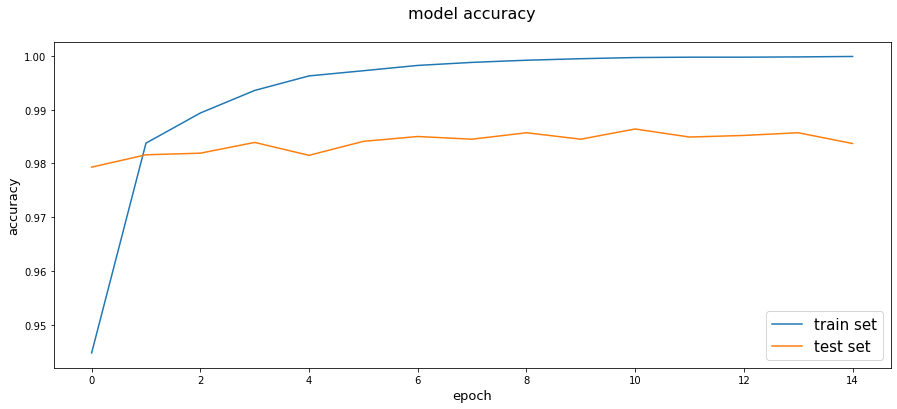

In [11]:
plot_history(history1)

Ten model radzi sobie lepiej od poprzedniego z danymi treningowymi (mamy loss na poziomie 3.5e-01 i accuracy 1.0000), natomiast spadło accuracy w przypadku zbioru testowego. Cięzko jednak mówić o overfitingu, bo różnica pomiędzy accuracy zbioru treningowego i testowego wynosi zaledwie lekko powyżej jednego punkta procentowego.

### 2. Zmiana parametrów warst

Zmienimy funkcje aktywacji na sigmoid.

In [12]:
m2 = models.Sequential()
m2.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
m2.add(layers.MaxPooling2D((2, 2)))
m2.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
m2.add(layers.MaxPooling2D((2, 2)))
m2.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
m2.add(layers.Flatten())
m2.add(layers.Dense(64, activation='sigmoid'))
m2.add(layers.Dense(10, activation='softmax'))

In [13]:
m2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history2 = m2.fit(train_images, train_labels, epochs = 15, 
                 batch_size = 128, validation_data = (test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 43s 90ms/step - loss: 1.8401 - accuracy: 0.3532 - val_loss: 0.3729 - val_accuracy: 0.9024
Epoch 2/15
469/469 [==============================] - 42s 89ms/step - loss: 0.3154 - accuracy: 0.9109 - val_loss: 0.1764 - val_accuracy: 0.9473
Epoch 3/15
469/469 [==============================] - 44s 93ms/step - loss: 0.1599 - accuracy: 0.9538 - val_loss: 0.1088 - val_accuracy: 0.9684
Epoch 4/15
469/469 [==============================] - 42s 89ms/step - loss: 0.1076 - accuracy: 0.9676 - val_loss: 0.0719 - val_accuracy: 0.9772
Epoch 5/15
469/469 [==============================] - 42s 90ms/step - loss: 0.0818 - accuracy: 0.9745 - val_loss: 0.0665 - val_accuracy: 0.9784
Epoch 6/15
469/469 [==============================] - 43s 92ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0518 - val_accuracy: 0.9841
Epoch 7/15
469/469 [==============================] - 42s 91ms/step - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0484 - val_accuracy:

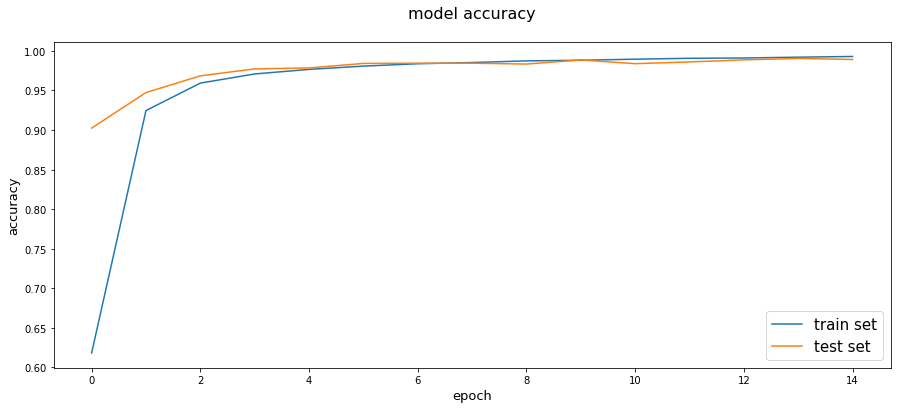

In [14]:
plot_history(history2)

Tym razem przez skalę osi y ciężej zobaczyć co otrzymaliśmy więc wyświetlmy sobie dokładną wartość w ostatniej epoce (accuracy na zbiorze testowym):

In [15]:
history2.history['val_accuracy'][-1] #  model 2

0.9890999794006348

In [16]:
history.history['val_accuracy'][-1] #  model poczatkowy

0.9937999844551086

W porównaniu z początkowym modelem ten wydaje się być gorszy, przede wszystkim przy początkowych epokach wyniki są znacząco gorsze, ale po 15 także mamy niższe accuracy na zbiorze testowym (ponieważ w naszym początkowym modelu przekroczyliśmy 99%). Mimo to różnice te są niewielkie.

### 3. Zmiana parametrów treningu

Wykorzystamy nasz początkowy model (tzn. zbudujemy nowy w taki sam sposób). Nie będziemy zmieniać liczby epok, bo i tak po każdej dostajemy wartości accuracy i je umieszczamy na wykresie. Możemy spróbować ustawić inny **batch_size**.

In [17]:
m3 = models.Sequential()
m3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
m3.add(layers.MaxPooling2D((2, 2)))
m3.add(layers.Conv2D(64, (3, 3), activation='relu'))
m3.add(layers.MaxPooling2D((2, 2)))
m3.add(layers.Conv2D(64, (3, 3), activation='relu'))
m3.add(layers.Flatten())
m3.add(layers.Dense(64, activation='relu'))
m3.add(layers.Dense(10, activation='softmax'))

In [18]:
m3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history3 = m3.fit(train_images, train_labels, epochs = 15, 
                 batch_size = 32, validation_data = (test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 52s 27ms/step - loss: 0.3072 - accuracy: 0.8982 - val_loss: 0.0463 - val_accuracy: 0.9859
Epoch 2/15
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0313 - val_accuracy: 0.9903
Epoch 3/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0290 - val_accuracy: 0.9910
Epoch 4/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 5/15
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0377 - val_accuracy: 0.9899
Epoch 6/15
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0351 - val_accuracy: 0.9913
Epoch 7/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.0364 -

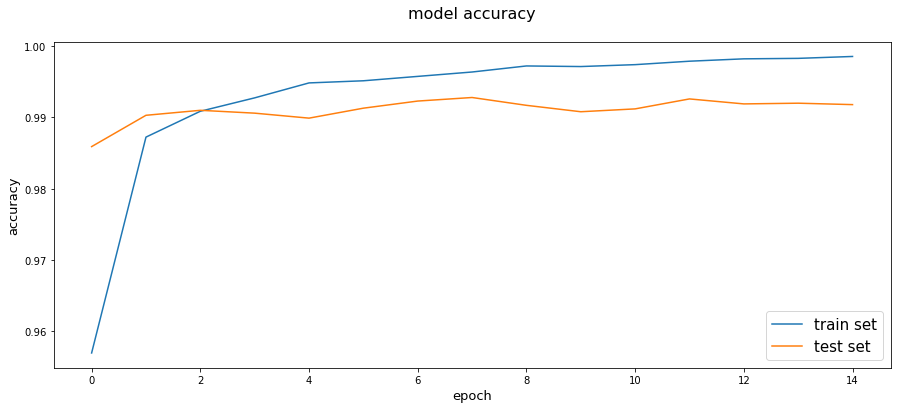

In [19]:
plot_history(history3)

Po pierwsze zwiększył się czas oczekiwania kodu (myślałem, że będzie na odwrót, tzn. że polepszy się czas, bo tak przeczytałem na stacku). Poza tym otrzymaliśmy gorsze accuracy na zbiorze testowym niż w początkowym modelu po 15 epokach.
Widać też, że pod sam koniec zaczeło nam accuracy spadać i możemy podejrzeć jak to wyglądało w najlepszym momencie naszego modelu ze zmniejszonym batch_size:

In [20]:
print(history3.history['val_accuracy'][-3])
print(history.history['val_accuracy'][-3])

0.9919000267982483
0.9901000261306763


Widzimy, że wtedy nasz model radził sobie lepiej od początkowego.

Analogicznie możemy skontruować znowu identyczny model jak początkowy, ale tym razem podmienić fucnkję **loss** i zastosować np. loss="poisson".

In [21]:
m4 = models.Sequential()
m4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
m4.add(layers.MaxPooling2D((2, 2)))
m4.add(layers.Conv2D(64, (3, 3), activation='relu'))
m4.add(layers.MaxPooling2D((2, 2)))
m4.add(layers.Conv2D(64, (3, 3), activation='relu'))
m4.add(layers.Flatten())
m4.add(layers.Dense(64, activation='relu'))
m4.add(layers.Dense(10, activation='softmax'))

In [22]:
m4.compile(optimizer='rmsprop',
                loss='poisson',
                metrics=['accuracy'])

history4 = m4.fit(train_images, train_labels, epochs = 15, 
                 batch_size = 128, validation_data = (test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 43s 89ms/step - loss: 0.1531 - accuracy: 0.8294 - val_loss: 0.1053 - val_accuracy: 0.9824
Epoch 2/15
469/469 [==============================] - 41s 88ms/step - loss: 0.1061 - accuracy: 0.9808 - val_loss: 0.1062 - val_accuracy: 0.9791
Epoch 3/15
469/469 [==============================] - 43s 93ms/step - loss: 0.1039 - accuracy: 0.9881 - val_loss: 0.1036 - val_accuracy: 0.9871
Epoch 4/15
469/469 [==============================] - 61s 129ms/step - loss: 0.1027 - accuracy: 0.9915 - val_loss: 0.1027 - val_accuracy: 0.9914
Epoch 5/15
469/469 [==============================] - 47s 101ms/step - loss: 0.1020 - accuracy: 0.9937 - val_loss: 0.1028 - val_accuracy: 0.9914
Epoch 6/15
469/469 [==============================] - 45s 96ms/step - loss: 0.1017 - accuracy: 0.9945 - val_loss: 0.1023 - val_accuracy: 0.9929
Epoch 7/15
469/469 [==============================] - 50s 106ms/step - loss: 0.1012 - accuracy: 0.9962 - val_loss: 0.1027 - val_accura

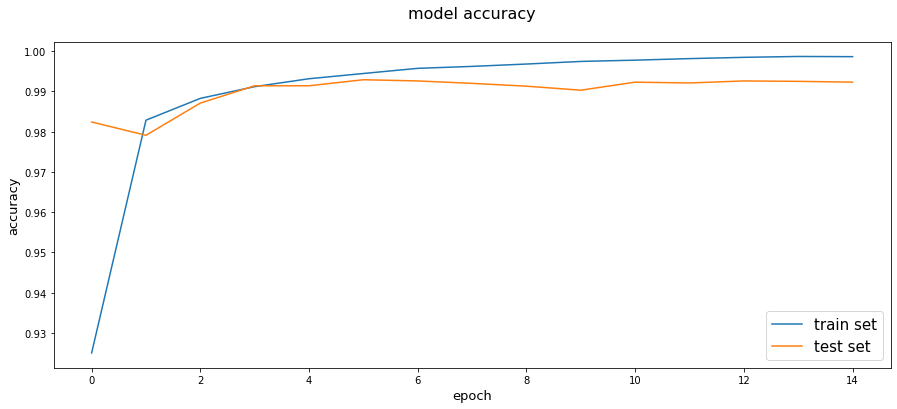

In [23]:
plot_history(history4)

In [24]:
for i in range(15):
    print(history4.history['val_accuracy'][i] > history.history['val_accuracy'][i])

True
False
False
True
False
True
True
True
False
False
False
False
True
False
False


Właściwie można powiedzieć, że ten model radził sobie lepiej od początkowego, szybciej się uczył, a także po ostatniej epoce ma wyższe accuracy.

### 4. Zmniejszenie ilości danych

Wydaje się naturalne, że zmniejszenie ilości danych testowych pogorszy nam wyniki, ale możemy to sprawdzić opcinając dane trenginowe o połowe.

In [25]:
train_images = train_images[:30000]
train_labels = train_labels[:30000]

In [26]:
m5 = models.Sequential()
m5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
m5.add(layers.MaxPooling2D((2, 2)))
m5.add(layers.Conv2D(64, (3, 3), activation='relu'))
m5.add(layers.MaxPooling2D((2, 2)))
m5.add(layers.Conv2D(64, (3, 3), activation='relu'))
m5.add(layers.Flatten())
m5.add(layers.Dense(64, activation='relu'))
m5.add(layers.Dense(10, activation='softmax'))

m5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history5 = m5.fit(train_images, train_labels, epochs = 15,
                  batch_size = 128, validation_data = (test_images, test_labels))

Epoch 1/15
235/235 [==============================] - 24s 97ms/step - loss: 0.7848 - accuracy: 0.7491 - val_loss: 0.1071 - val_accuracy: 0.9634
Epoch 2/15
235/235 [==============================] - 23s 96ms/step - loss: 0.1080 - accuracy: 0.9665 - val_loss: 0.0757 - val_accuracy: 0.9730
Epoch 3/15
235/235 [==============================] - 22s 93ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0608 - val_accuracy: 0.9816
Epoch 4/15
235/235 [==============================] - 22s 94ms/step - loss: 0.0407 - accuracy: 0.9866 - val_loss: 0.0395 - val_accuracy: 0.9872
Epoch 5/15
235/235 [==============================] - 22s 92ms/step - loss: 0.0299 - accuracy: 0.9896 - val_loss: 0.0369 - val_accuracy: 0.9879
Epoch 6/15
235/235 [==============================] - 22s 94ms/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.0470 - val_accuracy: 0.9840
Epoch 7/15
235/235 [==============================] - 22s 95ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0336 - val_accuracy:

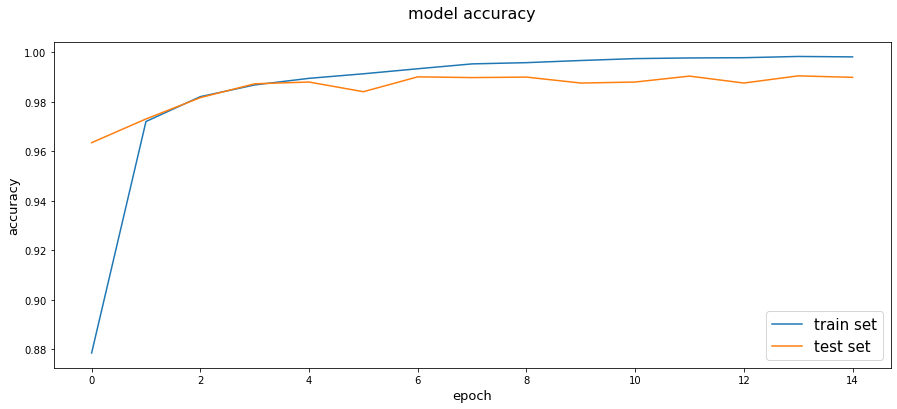

In [27]:
plot_history(history5)

In [28]:
history5.history['val_accuracy'][-1]

0.989799976348877

Wynik nie odbiega jakoś bardzo od uzyskanego przy 60000 zdjęciach, a czas wykonania zmniejszył się o około połowe, więc przy braku dużej ilości czasu wygląda jakby można było rozważać używanie jedynie połowy zbioru (a może jeszcze mniej?), ale w ogólnym przypadku czym więcej danych, tym lepiej i w praktycznych zastosowaniach na pewno warto zaczekać nawet godzinę (a może i pare dni), dla uzyskania chociażby poprawienie accuracy o 0.01.

# Podsumowanie

Ablation Study pomoga w zrozumieniu na co może wpływać konkretna zmiana modelu, a przy okazji pomaga wybrać jak najlepszy model. Mimo to było to zadanie na pewno bardzo czasochłonne (w kontekście wykonywania się obliczeń).